# Notebook to compare the datasets -> to use in report

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the results for each dataset

In [37]:
#importing the results for each dataset
all_results = []

def load_result(type_of_dataset):
    result_path = f"../artifacts/{type_of_dataset}/test_results.csv"
    df = pd.read_csv(result_path)
    df["dataset"] = type_of_dataset
    all_results.append(df)
    return df
    
# no_punctuation models' results
results_no_punc = load_result("no_punctuation")

# no_punctuation_no_stop_words models' results
results_no_punc_no_stop_words = load_result("no_punctuation_no_stop_words")

# punctuation models' results
results_punc = load_result("punctuation")

# punctuation_no_stop_words models' results
results_punc_no_stop_words = load_result("punctuation_no_stop_words")

## Build comparison table

### All models

In [38]:
# Combine all results
df_all = pd.concat(all_results)

# Optional: reorder columns for clarity
df_all = df_all[["dataset", "accuracy", "precision_macro", "recall_macro", "f1_macro"]]

# Reset index to have model names as a column
df_all.reset_index(inplace=True)
df_all.rename(columns={"index": "model"}, inplace=True)

# Show combined table
print("\n=== Combined Test Results ===")
display(df_all)

# Save combined results to a CSV for reference
df_all.to_csv("../../report/assets/dataset_comparison/combined_test_results.csv", index=False)


=== Combined Test Results ===


,model,dataset,accuracy,precision_macro,recall_macro,f1_macro
0,0,no_punctuation,0.715506,0.715631,0.715469,0.715441
1,1,no_punctuation,0.737816,0.743557,0.738033,0.736377
2,2,no_punctuation,0.852057,0.852314,0.852018,0.852019
3,3,no_punctuation,0.857437,0.858570,0.857357,0.857304
4,4,no_punctuation,0.866297,0.866477,0.866329,0.866287
5,0,no_punctuation_no_stop_words,0.838133,0.839651,0.838037,0.837924
6,1,no_punctuation_no_stop_words,0.850791,0.850859,0.850811,0.850788
7,2,no_punctuation_no_stop_words,0.905222,0.905253,0.905209,0.905217
8,3,no_punctuation_no_stop_words,0.903639,0.903649,0.903633,0.903637
9,4,no_punctuation_no_stop_words,0.920886,0.920894,0.920894,0.920886


### Average

In [39]:
# Compute average for each dataset
avg_results = pd.DataFrame({
    "No Punctuation": results_no_punc[["accuracy", "precision_macro", "recall_macro", "f1_macro"]].mean(),
    "No Punctuation + No Stopwords": results_no_punc_no_stop_words[["accuracy", "precision_macro", "recall_macro", "f1_macro"]].mean(),
    "With Punctuation": results_punc[["accuracy", "precision_macro", "recall_macro", "f1_macro"]].mean(),
    "With Punctuation + No Stopwords": results_punc_no_stop_words[["accuracy", "precision_macro", "recall_macro", "f1_macro"]].mean()
}).T

# Optionally round the results for display
avg_results = avg_results.round(4)

# Display the average table
print("\n=== Average Test Metrics per Dataset ===")
display(avg_results)

# Save to CSV for later reference
avg_results.to_csv("../../report/assets/dataset_comparison/avg_test_results_per_dataset.csv")


=== Average Test Metrics per Dataset ===


,accuracy,precision_macro,recall_macro,f1_macro
No Punctuation,0.8058,0.8073,0.8058,0.8055
No Punctuation + No Stopwords,0.8837,0.8841,0.8837,0.8837
With Punctuation,0.8869,0.8869,0.8869,0.8869
With Punctuation + No Stopwords,0.8847,0.8848,0.8847,0.8847


## Heatmap

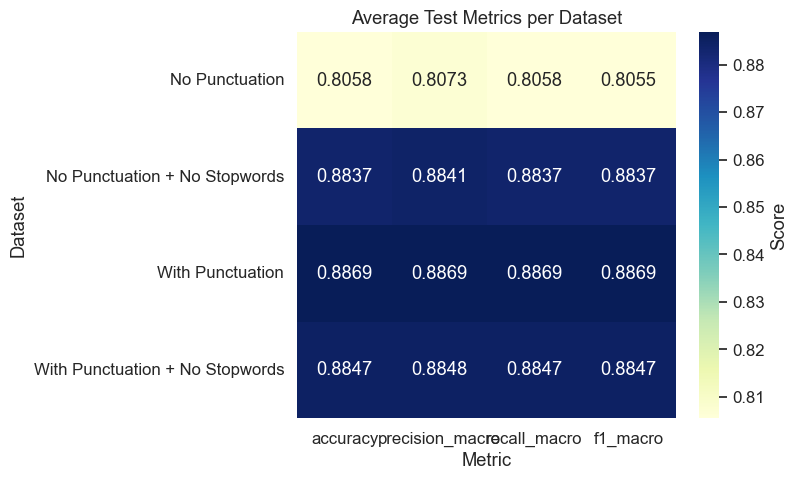

In [40]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create the heatmap
sns.heatmap(
    avg_results, 
    annot=True,        # show the numbers
    fmt=".4f",         # number format
    cmap="YlGnBu",     # color map
    cbar_kws={'label': 'Score'}  # color bar label
)

# Add title and labels
plt.title("Average Test Metrics per Dataset")
plt.ylabel("Dataset")
plt.xlabel("Metric")
plt.tight_layout()

## Save plot for later reference
plt.savefig("../../report/assets/dataset_comparison/avg_metrics_heatmap.png", dpi=300)

plt.show()


## BarChart

/var/folders/v8/97k6b3016p1463gcjcpmcnmr0000gn/T/ipykernel_20379/1059431358.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


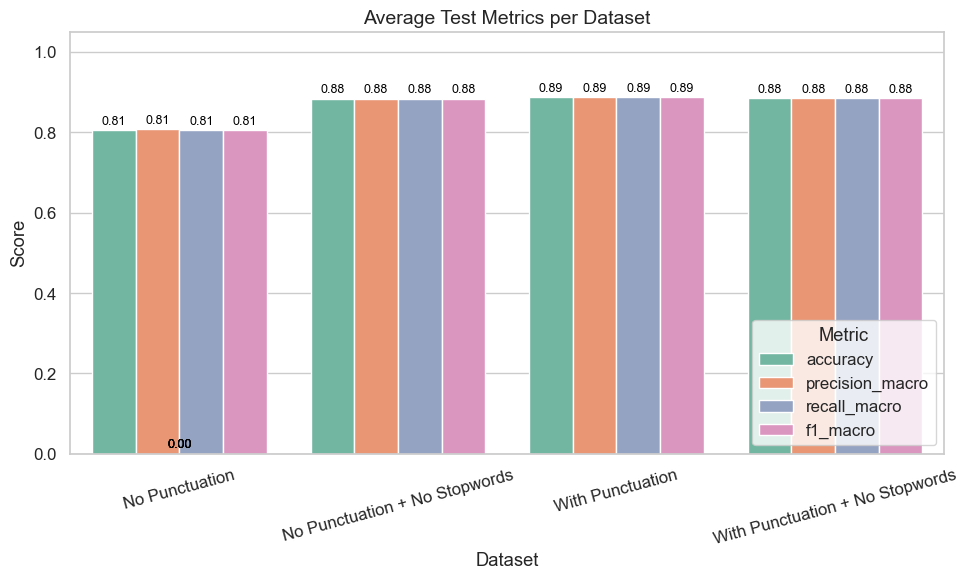

In [41]:
# Reset index and reshape for plotting
avg_results_reset = avg_results.reset_index().rename(columns={"index": "dataset"})
df_long = avg_results_reset.melt(
    id_vars="dataset", 
    value_vars=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
    var_name="Metric", 
    value_name="Score"
)

# Choose a qualitative palette tailored for categorical comparisons
palette = sns.color_palette("Set2", n_colors=4)  # 'Set2' is a popular qualitative palette

plt.figure(figsize=(10,6))
barplot = sns.barplot(
    x="dataset", 
    y="Score", 
    hue="Metric", 
    data=df_long, 
    palette=palette,
    ci=None
)

# Add data labels on bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9, color='black', xytext=(0,2),
                     textcoords='offset points')

# Titles, labels, and legend
plt.title("Average Test Metrics per Dataset", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Dataset")
plt.ylim(0, 1.05)
plt.xticks(rotation=15)
plt.legend(title="Metric")
plt.tight_layout()

## Save plot for later reference
plt.savefig("../../report/assets/dataset_comparison/avg_metrics_bar_chart.png", dpi=300)

plt.show()
